In [3]:
import sys
import os
sys.path.append("../scripts/")

import score_result

import networkx as nx
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [58]:
import glob

experiments = [
    os.path.basename(p)[:-len("_best_tree.txt")] for p in glob.glob("../realdata/pairtree/*_best_tree.txt")
]

experiments

['SJBALL022611',
 'SJBALL022610steph',
 'POP66_CPT_Short_66_G0',
 'SJETV010stephR1R2',
 'SJBALL022613',
 'CSC28_BRCD_CPT-11',
 'SJETV010stephR2',
 'SJETV043',
 'CSC28',
 'POP66_BRCD_Saline',
 'POP66_BRCD_DMSO',
 'POP66',
 'POP66_CPT_Short_66_CPT_39D4',
 'SJBALL022609',
 'POP66_CPT_Long_66_TR1',
 'SJETV010',
 'SJETV047',
 'POP66_CPT_Long_Primary',
 'SJBALL036',
 'SJETV010nohypermut',
 'POP66_CPT_Long_G0',
 'SJBALL022610',
 'POP66_CPT_Short_66_T5_3',
 'SJMLL039',
 'SJBALL022612',
 'SJMLL026',
 'POP66_CPT_Long_66_TR8',
 'CSC28_BRCD_Saline',
 'CSC28_BRCD_DMSO',
 'SJETV010stephR1',
 'POP66_CPT_Long_66_TR7',
 'CSC28_G0',
 'POP66_CPT_Short_Primary',
 'SJBALL022614',
 'POP66_T0_Cell_Line',
 'SJERG009',
 'SJBALL031']

In [59]:
def infer_matrices(freq_matrix, tree):
    clonal_matrix = score_result.construct_clonal_matrix(tree, len(tree.nodes))
    usage_matrix = score_result.one_vafpp_linear_program(clonal_matrix, freq_matrix)
    return clonal_matrix, usage_matrix
    
instances = []
for exp in experiments:
    freq_matrix = np.loadtxt(f"../realdata/allele_minima/{exp}_frequency_matrix.txt")
    if len(freq_matrix.shape) == 1:
        freq_matrix = freq_matrix.reshape((1, len(freq_matrix)))
    samples = pd.read_csv(f"../realdata/allele_minima/{exp}_samples.txt", header=None)
        
    pt = nx.read_adjlist(f"../realdata/pairtree/{exp}_best_tree.txt", nodetype=int, create_using=nx.DiGraph)
    am = nx.read_adjlist(f"../realdata/allele_minima/{exp}_inferred_tree.txt", nodetype=int, create_using=nx.DiGraph)
    am_clonal, am_usage = infer_matrices(freq_matrix, am)
    pt_clonal, pt_usage = infer_matrices(freq_matrix, pt)
    
    instances.append(
        {
            "experiment": exp, "am_usage": am_usage, "pt_usage": pt_usage,
            "frequency_matrix": freq_matrix, "am": am, "am_clonal": am_clonal,
            "pt": pt, "pt_clonal": pt_clonal, "samples": samples
        }
    )

Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (linux64)

CPU model: Intel(R) Xeon(R) CPU E5-2680 v4 @ 2.40GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 28 physical cores, 56 logical processors, using up to 28 threads

Optimize a model with 493 rows, 464 columns and 2494 nonzeros
Model fingerprint: 0xd0518ee3
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [3e-04, 1e+00]
Presolve removed 94 rows and 94 columns
Presolve time: 0.00s
Presolved: 399 rows, 370 columns, 1921 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    0.0000000e+00   6.533370e+01   0.000000e+00      0s
     198    1.2772000e+00   0.000000e+00   0.000000e+00      0s

Solved in 198 iterations and 0.01 seconds (0.00 work units)
Optimal objective  1.277200000e+00
Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (linux64)

CPU model: Intel(R) Xeon(R) CPU E5-2680 v4 @ 2.40GHz, instructio


CPU model: Intel(R) Xeon(R) CPU E5-2680 v4 @ 2.40GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 28 physical cores, 56 logical processors, using up to 28 threads

Optimize a model with 380 rows, 360 columns and 2340 nonzeros
Model fingerprint: 0xa8ecfeaa
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [6e-04, 1e+00]
Presolve removed 40 rows and 40 columns
Presolve time: 0.00s
Presolved: 340 rows, 320 columns, 1950 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    0.0000000e+00   5.749140e+01   0.000000e+00      0s
     170    9.0080000e-01   0.000000e+00   0.000000e+00      0s

Solved in 170 iterations and 0.01 seconds (0.00 work units)
Optimal objective  9.008000000e-01
Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (linux64)

CPU model: Intel(R) Xeon(R) CPU E5-2680 v4 @ 2.40GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 28 physical cores, 56 l

Thread count: 28 physical cores, 56 logical processors, using up to 28 threads

Optimize a model with 15 rows, 14 columns and 57 nonzeros
Model fingerprint: 0x9d6faf3c
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [5e-02, 1e+00]
Presolve time: 0.00s
Presolved: 15 rows, 14 columns, 57 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    0.0000000e+00   2.531800e+00   0.000000e+00      0s
       7    0.0000000e+00   0.000000e+00   0.000000e+00      0s

Solved in 7 iterations and 0.01 seconds (0.00 work units)
Optimal objective  0.000000000e+00
Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (linux64)

CPU model: Intel(R) Xeon(R) CPU E5-2680 v4 @ 2.40GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 28 physical cores, 56 logical processors, using up to 28 threads

Optimize a model with 15 rows, 14 columns and 73 nonzeros
Model fingerprint: 0xb75519d8
Coeffi


Solved in 810 iterations and 0.02 seconds (0.01 work units)
Optimal objective  6.717700000e+00
Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (linux64)

CPU model: Intel(R) Xeon(R) CPU E5-2680 v4 @ 2.40GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 28 physical cores, 56 logical processors, using up to 28 threads

Optimize a model with 13 rows, 12 columns and 44 nonzeros
Model fingerprint: 0x14cbfce7
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [4e-02, 1e+00]
Presolve time: 0.00s
Presolved: 13 rows, 12 columns, 44 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    0.0000000e+00   2.453600e+00   0.000000e+00      0s
       6    0.0000000e+00   0.000000e+00   0.000000e+00      0s

Solved in 6 iterations and 0.01 seconds (0.00 work units)
Optimal objective  0.000000000e+00
Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (linux64)

CPU model: Intel(R

  Bounds range     [0e+00, 0e+00]
  RHS range        [2e-04, 1e+00]
Presolve removed 198 rows and 198 columns
Presolve time: 0.00s
Presolved: 400 rows, 374 columns, 1777 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    0.0000000e+00   4.734890e+01   0.000000e+00      0s
     203    1.0387000e+00   0.000000e+00   0.000000e+00      0s

Solved in 203 iterations and 0.01 seconds (0.00 work units)
Optimal objective  1.038700000e+00
Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (linux64)

CPU model: Intel(R) Xeon(R) CPU E5-2680 v4 @ 2.40GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 28 physical cores, 56 logical processors, using up to 28 threads

Optimize a model with 754 rows, 696 columns and 3016 nonzeros
Model fingerprint: 0x55e683cf
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [4e-04, 1e+00]
Presolve time: 0.00s
Presolved: 754 rows, 696 columns,


Optimize a model with 798 rows, 756 columns and 3654 nonzeros
Model fingerprint: 0xbfeb38c0
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [4e-04, 1e+00]
Presolve removed 364 rows and 364 columns
Presolve time: 0.00s
Presolved: 434 rows, 392 columns, 1644 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    0.0000000e+00   5.042850e+01   0.000000e+00      0s
     212    1.0543000e+00   0.000000e+00   0.000000e+00      0s

Solved in 212 iterations and 0.01 seconds (0.00 work units)
Optimal objective  1.054300000e+00
Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (linux64)

CPU model: Intel(R) Xeon(R) CPU E5-2680 v4 @ 2.40GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 28 physical cores, 56 logical processors, using up to 28 threads

Optimize a model with 945 rows, 900 columns and 5940 nonzeros
Model fingerprint: 0x33a1c088
Coefficient statistics:
  Mat


Solved in 4 iterations and 0.01 seconds (0.00 work units)
Optimal objective  0.000000000e+00
Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (linux64)

CPU model: Intel(R) Xeon(R) CPU E5-2680 v4 @ 2.40GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 28 physical cores, 56 logical processors, using up to 28 threads

Optimize a model with 9 rows, 8 columns and 30 nonzeros
Model fingerprint: 0x1cbd9dfd
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [9e-02, 1e+00]
Presolve time: 0.00s
Presolved: 9 rows, 8 columns, 30 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    0.0000000e+00   1.729000e+00   0.000000e+00      0s
       4    0.0000000e+00   0.000000e+00   0.000000e+00      0s

Solved in 4 iterations and 0.01 seconds (0.00 work units)
Optimal objective  0.000000000e+00
Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (linux64)

CPU model: Intel(R) Xeon


Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    0.0000000e+00   8.056850e+01   0.000000e+00      0s
     256    1.7957000e+00   0.000000e+00   0.000000e+00      0s

Solved in 256 iterations and 0.01 seconds (0.00 work units)
Optimal objective  1.795700000e+00
Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (linux64)

CPU model: Intel(R) Xeon(R) CPU E5-2680 v4 @ 2.40GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 28 physical cores, 56 logical processors, using up to 28 threads

Optimize a model with 630 rows, 588 columns and 2898 nonzeros
Model fingerprint: 0xbc76d0d8
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [8e-04, 1e+00]
Presolve removed 100 rows and 100 columns
Presolve time: 0.00s
Presolved: 530 rows, 488 columns, 2274 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    0.0000000e+00   8.056850e+01   0.000000e+00  

In [60]:
"""                                                                                                                                                                           [40/1962]
Computes the set of all pairwise relations in a directed tree.
"""      
def get_relations(tree):                                                                   
    relations = set()
    for u in tree.nodes():
        for v in tree.nodes(): 
            if u == v:                 
                continue               
                                                                                           
            if nx.has_path(tree, u, v):                                                    
                relations.add((u, v))                                                      
                                                                                           
    return relations

rows = []
for inst in instances:
    am_error = inst["frequency_matrix"] - (inst["am_usage"] @ inst["am_clonal"])
    pt_error = inst["frequency_matrix"] - (inst["pt_usage"] @ inst["pt_clonal"])
    am_rels  = set(inst['pt'].edges) # get_relations(inst['pt'])
    pt_rels  = set(inst['am'].edges) # get_relations(inst['am'])
    sym_diff = (am_rels - pt_rels) | (pt_rels - am_rels)
    row = {
        "experiment": inst["experiment"],
        "am_l1_usage": np.abs(inst["am_usage"]).sum(),
        "am_l0_usage": (np.abs(inst["am_usage"]) != 0).sum(),
        "pt_l1_usage": np.abs(inst["pt_usage"]).sum(),
        "pt_l0_usage": (np.abs(inst["pt_usage"]) != 0).sum(),
        "am_l1_frequency": np.abs(am_error).sum(),
        "pt_l1_frequency": np.abs(pt_error).sum(),
        "am_l0_frequency": (am_error != 0).sum(),
        "pt_l0_frequency": (pt_error != 0).sum(),
        "relationship_symm_dif": len(sym_diff),
        "m": inst["frequency_matrix"].shape[0],
        "n": inst["frequency_matrix"].shape[1],
        "instance_size": inst["frequency_matrix"].shape[0] * inst["frequency_matrix"].shape[1],
        "identical": set(inst["am"].edges()) == set(inst["pt"].edges())
    }
    
    rows.append(row)
    
sparsity_df = pd.DataFrame(rows)
sparsity_df = sparsity_df[~sparsity_df['experiment'].str.contains('steph')]
sparsity_df

,experiment,am_l1_usage,am_l0_usage,pt_l1_usage,pt_l0_usage,am_l1_frequency,pt_l1_frequency,am_l0_frequency,pt_l0_frequency,relationship_symm_dif,m,n,instance_size,identical
0,SJBALL022611,14.1704,110,14.1704,110,1.277200e+00,1.277200e+00,83,83,0,29,8,232,True
2,POP66_CPT_Short_66_G0,1.0000,5,1.0000,5,5.551115e-17,5.551115e-17,1,1,4,1,5,5,False
4,SJBALL022613,10.3303,110,10.3303,110,9.008000e-01,9.008000e-01,60,60,0,20,9,180,True
5,CSC28_BRCD_CPT-11,1.0000,5,1.0000,5,0.000000e+00,0.000000e+00,0,0,6,1,5,5,False
7,SJETV043,20.8193,175,20.8193,175,7.694000e-01,7.706000e-01,73,71,2,42,8,336,False
8,CSC28,4.0000,22,4.0000,20,6.200000e-02,2.546000e-01,4,7,14,4,12,48,False
9,POP66_BRCD_Saline,1.0000,7,1.0000,7,0.000000e+00,1.110223e-16,0,1,8,1,7,7,False
10,POP66_BRCD_DMSO,1.0000,6,1.0000,6,0.000000e+00,0.000000e+00,0,0,6,1,6,6,False
11,POP66,8.0000,52,8.0000,39,2.342600e+00,5.972900e+00,39,54,32,8,27,216,False
12,POP66_CPT_Short_66_CPT_39D4,1.0000,5,1.0000,5,0.000000e+00,0.000000e+00,0,0,2,1,5,5,False


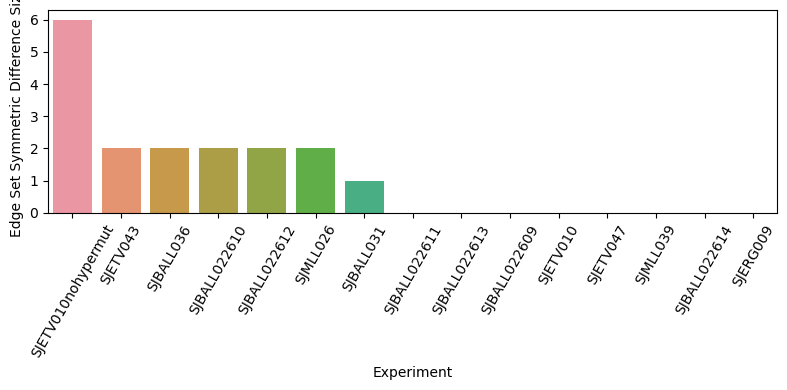

In [61]:
mask = sparsity_df['experiment'].str.contains('POP66') | sparsity_df['experiment'].str.contains('CSC28')

fig, ax = plt.subplots(figsize=(8,4))
sns.barplot(data=sparsity_df[~mask].sort_values(by='relationship_symm_dif', ascending=False),x='experiment',y='relationship_symm_dif',ax=ax)
ax.set_xlabel('Experiment')
ax.set_ylabel('Edge Set Symmetric Difference Size')
for tick in ax.get_xticklabels():
    tick.set_rotation(60)
    
fig.tight_layout()
fig.savefig("../results/figures/real_data_edge_set_symm_diff.pdf")

In [63]:
sparsity_df['normalized_l1_error'] = sparsity_df.am_l1_frequency / sparsity_df.instance_size

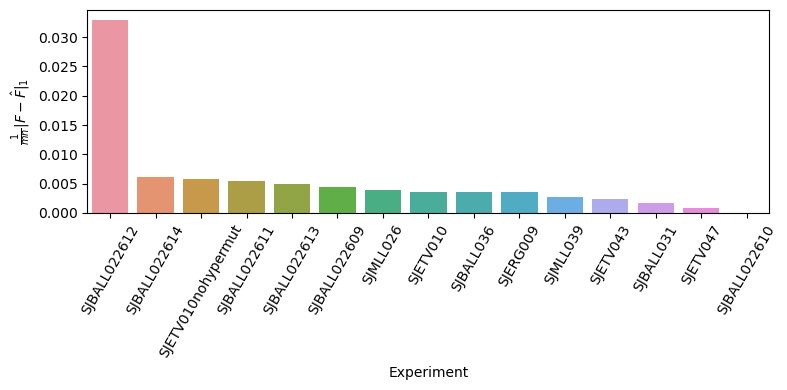

In [64]:
fig, ax = plt.subplots(figsize=(8,4))
sns.barplot(data=sparsity_df[~mask].sort_values(by='normalized_l1_error', ascending=False),x='experiment',y='normalized_l1_error',ax=ax)
ax.set_xlabel('Experiment')
ax.set_ylabel('$\\frac{1}{mn}|F-\hat{F}|_1$')
for tick in ax.get_xticklabels():
    tick.set_rotation(60)
    
fig.tight_layout()
fig.savefig("../results/figures/real_data_normalized_l1_error.pdf")

In [163]:
csc_pop_instances = list(filter(lambda x: x['experiment'] in ['POP66', 'CSC28'], instances))

dfs = []
for inst in csc_pop_instances:
    name = inst['experiment']
    
    for algorithm, usage_matrix in [('AlleleMinima', inst['am_usage']), ('Pairtree', inst['pt_usage'])]:
        result = {}
        shannon_diversity = -np.log(usage_matrix) * usage_matrix
        shannon_diversity[np.isnan(shannon_diversity)] = 0
        shannon_diversity = np.sum(shannon_diversity, axis=1)
        result['Shannon Diversity'] = shannon_diversity
        result['Sample'] = inst['samples'][0].to_list()
        df = pd.DataFrame(result)
        df['Patient'] = name
        df['Algorithm'] = algorithm
        dfs.append(df)
    
#shannon_diversity_df = pd.concat(dfs)

/tmp/ipykernel_207192/2997829746.py:9: RuntimeWarning: divide by zero encountered in log
  shannon_diversity = -np.log(usage_matrix) * usage_matrix
/tmp/ipykernel_207192/2997829746.py:9: RuntimeWarning: invalid value encountered in multiply
  shannon_diversity = -np.log(usage_matrix) * usage_matrix
/tmp/ipykernel_207192/2997829746.py:9: RuntimeWarning: divide by zero encountered in log
  shannon_diversity = -np.log(usage_matrix) * usage_matrix
/tmp/ipykernel_207192/2997829746.py:9: RuntimeWarning: invalid value encountered in multiply
  shannon_diversity = -np.log(usage_matrix) * usage_matrix
/tmp/ipykernel_207192/2997829746.py:9: RuntimeWarning: divide by zero encountered in log
  shannon_diversity = -np.log(usage_matrix) * usage_matrix
/tmp/ipykernel_207192/2997829746.py:9: RuntimeWarning: invalid value encountered in multiply
  shannon_diversity = -np.log(usage_matrix) * usage_matrix
/tmp/ipykernel_207192/2997829746.py:9: RuntimeWarning: divide by zero encountered in log
  shannon_d

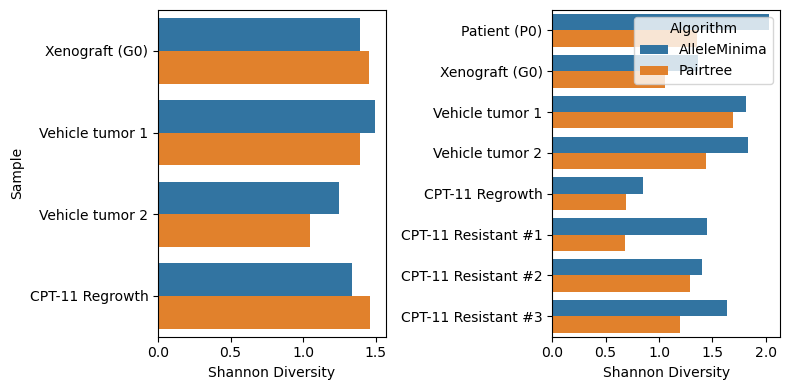

In [178]:
fig, axes = plt.subplots(figsize=(8, 4), ncols=2)
sns.barplot(data=shannon_diversity_df[shannon_diversity_df['Patient'] == 'CSC28'], x='Shannon Diversity', y='Sample', hue='Algorithm', ax=axes[0])
sns.barplot(data=shannon_diversity_df[shannon_diversity_df['Patient'] == 'POP66'], x='Shannon Diversity', y='Sample', hue='Algorithm', ax=axes[1])

axes[1].set_ylabel(None)
axes[0].get_legend().remove()
axes[1].legend(title='Algorithm', loc='upper right')

fig.tight_layout()
fig.savefig("../results/figures/diversity_index.pdf")

In [183]:
dfs = []
for inst in csc_pop_instances:
    name = inst['experiment']
    
    for algorithm, usage_matrix, clonal_matrix in [('AlleleMinima', inst['am_usage'], inst['am_clonal']), ('Pairtree', inst['pt_usage'], inst['pt_clonal'])]:
        result = {}
        l2_error = np.square(inst['frequency_matrix'] - usage_matrix @ clonal_matrix)
        l2_error = l2_error.sum(axis = 1)
        result['Squared Sample Error'] = l2_error
        result['Sample'] = inst['samples'][0].to_list()
        df = pd.DataFrame(result)
        df['Patient'] = name
        df['Algorithm'] = algorithm
        dfs.append(df)
sample_error_df = pd.concat(dfs)

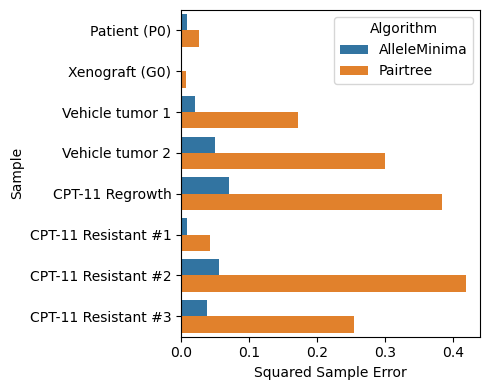

In [197]:
fig, ax = plt.subplots(figsize=(5, 4), ncols=1)
sns.barplot(data=sample_error_df[sample_error_df['Patient'] == 'POP66'], x='Squared Sample Error', y='Sample', hue='Algorithm', ax=ax)
#sns.barplot(data=sample_error_df[sample_error_df['Patient'] == 'CSC28'], x='Squared Sample Error', y='Sample', hue='Algorithm', ax=axes[1])

fig.tight_layout()
fig.savefig("../results/figures/squared_sample_error.pdf")